In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing.data
y = housing.target

In [3]:
X.shape

(20640, 8)

In [9]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from keras import layers, models

# data split
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

# data scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

input_shape = (x_train.shape[1], )

# regression model 생성
regr_model = models.Sequential()

# unit : 하나의 layer 에 있는 퍼셉트론의 개수
regr_model.add(layers.Dense(units = 4, activation = 'relu', input_shape = input_shape))
regr_model.add(layers.Dense(units = 2, activation = 'relu')) # relu 는 음수는 0 양수는 1
regr_model.add(layers.Dense(units = 1, activation = 'linear')) # linear 는 입력값 그대로

regr_model.compile(loss='mean_squared_error')
regr_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
input_shape

(8,)

In [10]:
# 학습 과정을 history에 저장
history = regr_model.fit(x_train, y_train, validation_data = [x_test, y_test], epochs = 20)

Epoch 1/20
516/516 [==============================] - 7s 4ms/step - loss: 2.3183 - val_loss: 0.9579
Epoch 2/20
516/516 [==============================] - 2s 3ms/step - loss: 0.7901 - val_loss: 0.5944
Epoch 3/20
516/516 [==============================] - 2s 3ms/step - loss: 0.5524 - val_loss: 0.4839
Epoch 4/20
516/516 [==============================] - 2s 3ms/step - loss: 0.4573 - val_loss: 0.4175
Epoch 5/20
516/516 [==============================] - 2s 4ms/step - loss: 0.4184 - val_loss: 0.3947
Epoch 6/20
516/516 [==============================] - 2s 4ms/step - loss: 0.4045 - val_loss: 0.3847
Epoch 7/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3976 - val_loss: 0.3801
Epoch 8/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3936 - val_loss: 0.3780
Epoch 9/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3913 - val_loss: 0.3794
Epoch 10/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3911 - val_loss: 0.3748

In [13]:
history.history

{'loss': [2.318276882171631,
  0.7900736927986145,
  0.5523976683616638,
  0.45729541778564453,
  0.4183727502822876,
  0.40450233221054077,
  0.3976098299026489,
  0.3935978412628174,
  0.39132264256477356,
  0.391085684299469,
  0.38723576068878174,
  0.38620513677597046,
  0.38611623644828796,
  0.38359758257865906,
  0.3848268687725067,
  0.38332399725914,
  0.38670289516448975,
  0.3819572925567627,
  0.3881143033504486,
  0.38398173451423645],
 'val_loss': [0.9578682780265808,
  0.5944023728370667,
  0.4838527739048004,
  0.4174908697605133,
  0.3946603238582611,
  0.38465455174446106,
  0.38005331158638,
  0.3780484199523926,
  0.37936466932296753,
  0.3747834861278534,
  0.3719237148761749,
  0.37056398391723633,
  0.36948513984680176,
  0.3684144616127014,
  0.3672270178794861,
  0.3676343262195587,
  0.3660831153392792,
  0.36699602007865906,
  0.36338096857070923,
  0.3645467758178711]}

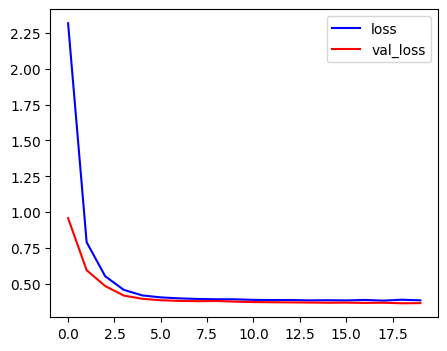

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))

plt.plot(history.history['loss'], c='b', label='loss')
plt.plot(history.history['val_loss'], c='r', label='val_loss')
plt.legend()

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')

X = mnist.data
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [16]:
from sklearn.preprocessing import LabelBinarizer

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

input_shape = (x_train.shape[1], )

# Sequential 안에 레이어를 나열하는 식으로 모델 생성
clf_model = models.Sequential([
    layers.Dense(units = 50, activation = 'relu', input_shape = input_shape),
    layers.Dense(units = 20, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

# multinomial classification의 경우 categorical crossentropy loss 사용
clf_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
clf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
Total params: 40480 (158.12 KB)
Trainable params: 40480 (158.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = clf_model.fit(x_train, y_train, validation_data=[x_test, y_test], batch_size=256, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.4940 - accuracy: 0.8616 - val_loss: 0.2441 - val_accuracy: 0.9369
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1765 - accuracy: 0.9494 - val_loss: 0.2028 - val_accuracy: 0.9511
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1307 - accuracy: 0.9616 - val_loss: 0.1800 - val_accuracy: 0.9584
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1040 - accuracy: 0.9695 - val_loss: 0.1742 - val_accuracy: 0.9614
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.1703 - val_accuracy: 0.9636
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0729 - accuracy: 0.9783 - val_loss: 0.1708 - val_accuracy: 0.9641
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0625 - accuracy: 0.9810 - val_loss: 0.1677 - val_accuracy: 0.9648
Epoch 

# 과제

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer

In [19]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')

X = mnist.data
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [20]:
# 각 픽셀값의 범위를 0~255에서 0~1로 정규화
X /= 255.

# 2d image의 형태로 reshape
X = X.values.reshape(-1, 28, 28, 1) # (70000, 784) ==> (70000, 28, 28, 1)

In [21]:
def plot_images(images, labels):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.xlabel(labels[i])
    plt.show()

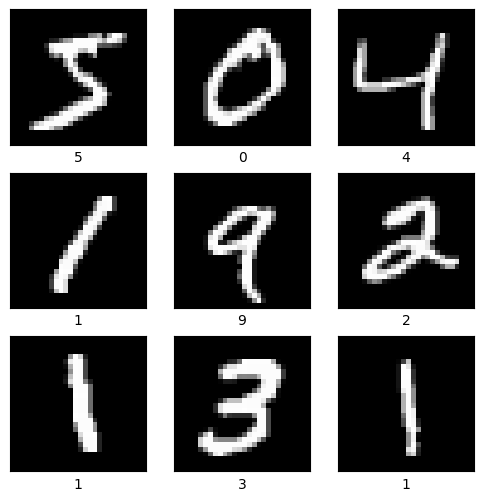

In [22]:
plot_images(X[:9], y[:9])

In [26]:
# X와 y를 train set, test set으로 split
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

# LabelBinarizer를 사용하여 one-hot encoding 진행
encoer = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# CNN 모델 생성 / # CNN layer 3개, fc layer 2개
CNN_model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])


# 모델 컴파일
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_model.summary()

# output shape (None, filtersize, filtersize, ?)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [27]:
# 모델 학습
history = CNN_model.fit(x_train, y_train, validation_data=[x_test, y_test], batch_size=256, epochs=20)

Epoch 1/20
219/219 [==============================] - 9s 9ms/step - loss: 0.6252 - accuracy: 0.8034 - val_loss: 0.1149 - val_accuracy: 0.9641
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1842 - accuracy: 0.9463 - val_loss: 0.0731 - val_accuracy: 0.9767
Epoch 3/20
219/219 [==============================] - 1s 7ms/step - loss: 0.1316 - accuracy: 0.9629 - val_loss: 0.0569 - val_accuracy: 0.9816
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1044 - accuracy: 0.9700 - val_loss: 0.0517 - val_accuracy: 0.9828
Epoch 5/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0861 - accuracy: 0.9750 - val_loss: 0.0476 - val_accuracy: 0.9849
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0759 - accuracy: 0.9784 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0668 - accuracy: 0.9809 - val_loss: 0.0389 - val_accuracy: 0.9881
Epoch 

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

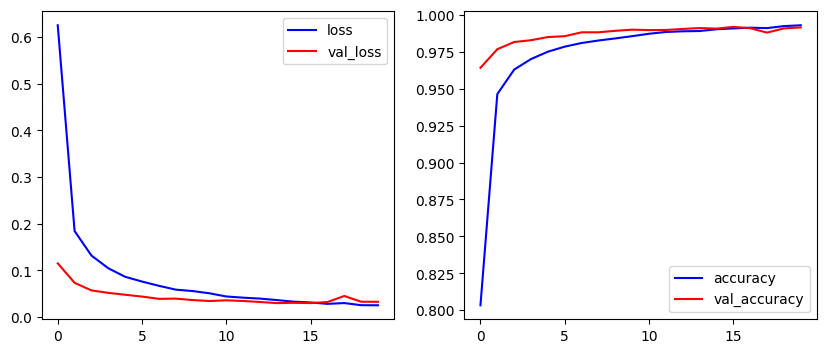

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(history.history['loss'], c='b', label='loss')
ax[0].plot(history.history['val_loss'], c='r', label='val_loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], c='b', label='accuracy')
ax[1].plot(history.history['val_accuracy'], c='r', label='val_accuracy')
ax[1].legend()

In [31]:
# 모델 검증 : output [loss, accuracy]
CNN_model.evaluate(x_test, y_test)

438/438 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9914


[0.03253328427672386, 0.991428554058075]